In [43]:
import matplotlib.pyplot as plt
import pandas_profiling
import seaborn as sns
import pandas as pd 
import numpy as np
import random

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
species = "toluene"

In [3]:
in_train = pd.read_csv(f'/glade/scratch/cbecker/gecko_data/{species}_train_in_binned.csv')
#out_train = pd.read_csv(f'/glade/scratch/cbecker/gecko_data/{species}_train_out_binned.csv')
#in_val = pd.read_csv(f'/glade/scratch/cbecker/gecko_data/{species}_val_in_binned.csv')
#out_val = pd.read_csv(f'/glade/scratch/cbecker/gecko_data/{species}_val_out_binned.csv')

In [4]:
in_train.columns

Index(['Time [s]', 'Precursor [ug/m3]', 'Gas [ug/m3] Bin01: lg(C*) = -6.5',
       'Gas [ug/m3] Bin02: lg(C*) = -5.5', 'Gas [ug/m3] Bin03: lg(C*) = -4.5',
       'Gas [ug/m3] Bin04: lg(C*) = -3.5', 'Gas [ug/m3] Bin05: lg(C*) = -2.5',
       'Gas [ug/m3] Bin06: lg(C*) = -1.5', 'Gas [ug/m3] Bin07: lg(C*) = -0.5',
       'Gas [ug/m3] Bin08: lg(C*) =  0.5', 'Gas [ug/m3] Bin09: lg(C*) =  1.5',
       'Gas [ug/m3] Bin10: lg(C*) =  2.5', 'Gas [ug/m3] Bin11: lg(C*) =  3.5',
       'Gas [ug/m3] Bin12: lg(C*) =  4.5', 'Gas [ug/m3] Bin13: lg(C*) =  5.5',
       'Gas [ug/m3] Bin14: lg(C*) =  6.5',
       'Aerosol [ug_m3] Bin01: lg(C*) = -6.5',
       'Aerosol [ug_m3] Bin02: lg(C*) = -5.5',
       'Aerosol [ug_m3] Bin03: lg(C*) = -4.5',
       'Aerosol [ug_m3] Bin04: lg(C*) = -3.5',
       'Aerosol [ug_m3] Bin05: lg(C*) = -2.5',
       'Aerosol [ug_m3] Bin06: lg(C*) = -1.5',
       'Aerosol [ug_m3] Bin07: lg(C*) = -0.5',
       'Aerosol [ug_m3] Bin08: lg(C*) =  0.5',
       'Aerosol [ug_m3] Bin09: 

In [5]:
in_train = in_train.drop(columns = ["Time [s]", "id"])

In [6]:
in_train["Precursor [ug/m3]"] = 10**in_train["Precursor [ug/m3]"]

### Run the profiler on the whole df (slow)

In [7]:
#profile = in_train.profile_report(title='Pandas Profiling Report')

In [8]:
#profile

In [9]:
#profile.to_file("toluene_binned_report.html")

### Correlation matrix

In [10]:
corr_mat = in_train.corr(method='pearson')

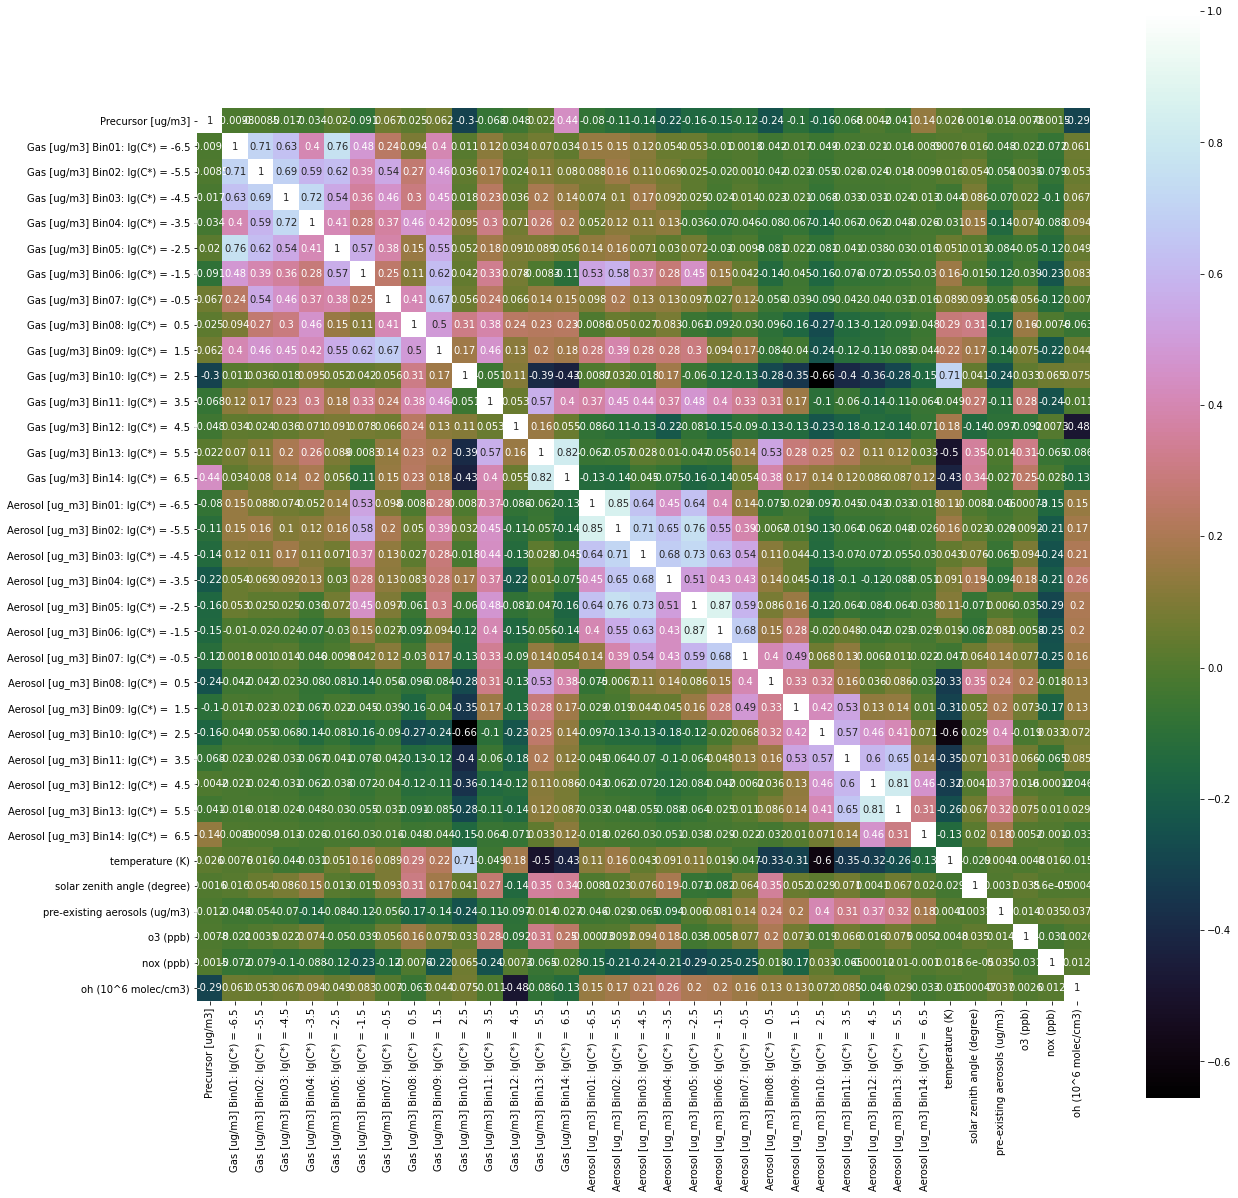

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat, vmax=1, square=True, annot=True, cmap='cubehelix')

### PCA analysis

Text(0, 0.5, 'Cumulative explained variance')

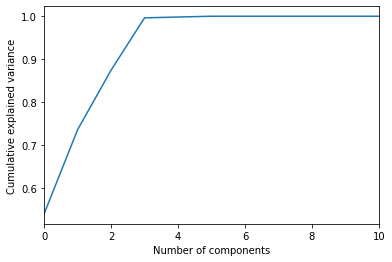

In [12]:
pca = PCA().fit(in_train)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlim(0,10,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [13]:
# in_Train = pca.transform(in_train)

# sns.set(style='darkgrid')
# f, ax = plt.subplots(figsize=(8, 8))
# # ax.set_aspect('equal')
# ax = sns.kdeplot(in_Train[:,0], in_Train[:,1], cmap="Greens",
#           shade=True, shade_lowest=False)
# ax = sns.kdeplot(in_Train[:,1], in_Train[:,2], cmap="Reds",
#           shade=True, shade_lowest=False)
# ax = sns.kdeplot(in_Train[:,2], in_Train[:,3], cmap="Blues",
#           shade=True, shade_lowest=False)

# red = sns.color_palette("Reds")[-2]
# blue = sns.color_palette("Blues")[-2]
# green = sns.color_palette("Greens")[-2]

# ax.text(0.5, 0.5, "2nd and 3rd Projection", size=12, color=blue)
# ax.text(-4, 0.0, "1st and 3rd Projection", size=12, color=red)
# ax.text(2, 0, "1st and 2nd Projection", size=12, color=green)

# plt.xlim(-6,5)
# plt.ylim(-2,2)

### Check out the environmental variables first

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b61daac5750>,
      dtype=object)

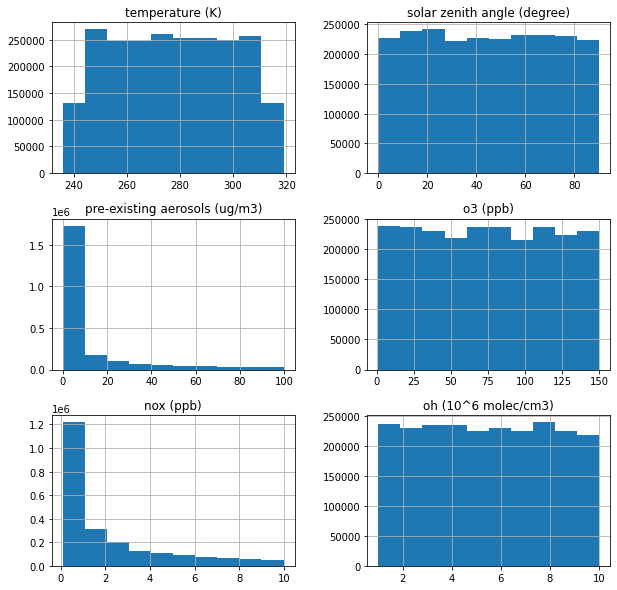

In [21]:
in_train[[
    'temperature (K)', 
    'solar zenith angle (degree)', 
    'pre-existing aerosols (ug/m3)', 
    'o3 (ppb)', 
    'nox (ppb)', 
    'oh (10^6 molec/cm3)'
]].hist(figsize=(10,10))

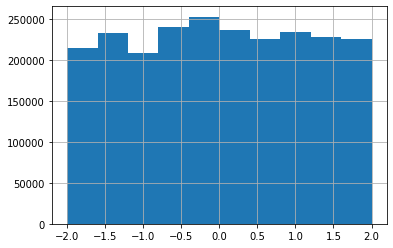

In [24]:
np.log10(in_train['pre-existing aerosols (ug/m3)']).hist()

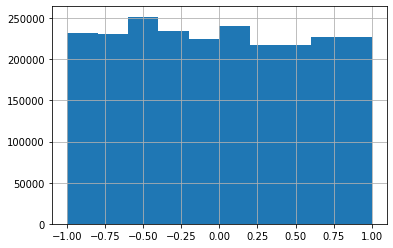

In [26]:
np.log10(in_train['nox (ppb)']).hist()

### Precursor

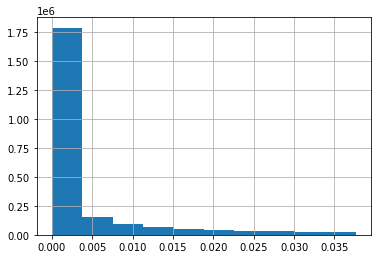

In [29]:
in_train['Precursor [ug/m3]'].hist()

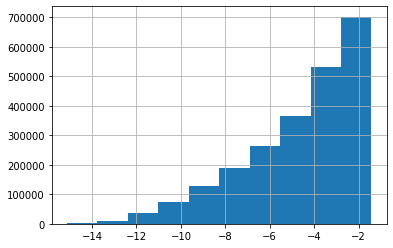

In [36]:
np.log10(in_train['Precursor [ug/m3]']).hist()

In [78]:
in_train['Precursor [ug/m3]'].to_numpy().shape

(2302400,)

In [148]:
scaler = MinMaxScaler((1.0e-12, 1)) # Prevent precursor from going above 1
resized = np.expand_dims(in_train['Precursor [ug/m3]'].to_numpy(), 1)
in_train['_p'] = scaler.fit_transform(resized).squeeze(1)

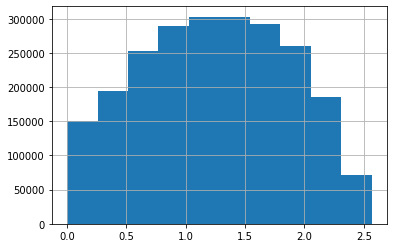

In [162]:
np.log1p(-np.log10(in_train['_p'])).hist()

### Gas

In [240]:
cols = [
    'Gas [ug/m3] Bin01: lg(C*) = -6.5',
    'Gas [ug/m3] Bin02: lg(C*) = -5.5', 'Gas [ug/m3] Bin03: lg(C*) = -4.5',
    'Gas [ug/m3] Bin04: lg(C*) = -3.5', 'Gas [ug/m3] Bin05: lg(C*) = -2.5',
    'Gas [ug/m3] Bin06: lg(C*) = -1.5', 'Gas [ug/m3] Bin07: lg(C*) = -0.5',
    'Gas [ug/m3] Bin08: lg(C*) =  0.5', 'Gas [ug/m3] Bin09: lg(C*) =  1.5',
    'Gas [ug/m3] Bin10: lg(C*) =  2.5', 'Gas [ug/m3] Bin11: lg(C*) =  3.5',
    'Gas [ug/m3] Bin12: lg(C*) =  4.5', 'Gas [ug/m3] Bin13: lg(C*) =  5.5',
    'Gas [ug/m3] Bin14: lg(C*) =  6.5'
]
gas = in_train[cols].copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b61e7f18350>,
      dtype=object)

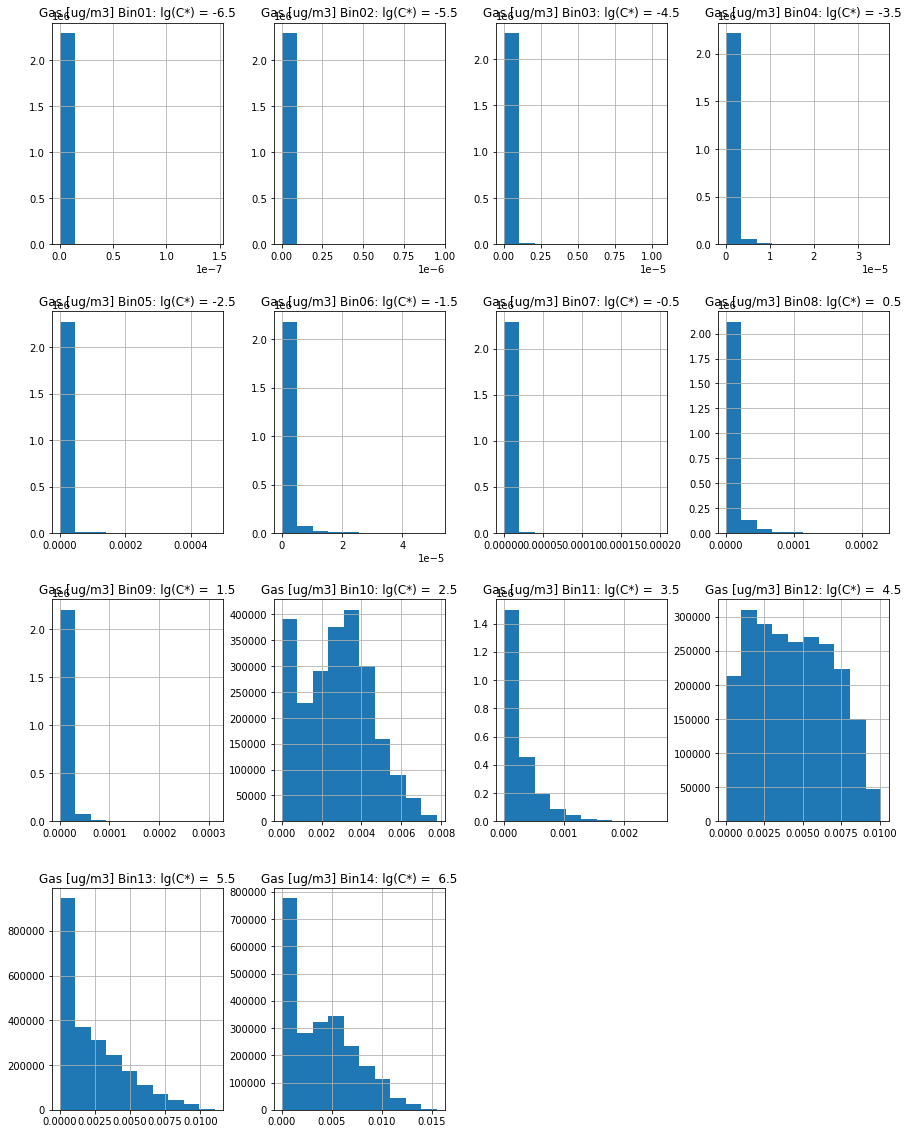

In [241]:
gas.hist(figsize=(15,20))

In [228]:
log_cols = [
    'Gas [ug/m3] Bin01: lg(C*) = -6.5',
    'Gas [ug/m3] Bin02: lg(C*) = -5.5', 'Gas [ug/m3] Bin03: lg(C*) = -4.5',
    'Gas [ug/m3] Bin04: lg(C*) = -3.5', 'Gas [ug/m3] Bin05: lg(C*) = -2.5',
    'Gas [ug/m3] Bin06: lg(C*) = -1.5', 'Gas [ug/m3] Bin07: lg(C*) = -0.5',
    'Gas [ug/m3] Bin08: lg(C*) =  0.5', 'Gas [ug/m3] Bin09: lg(C*) =  1.5',
    'Gas [ug/m3] Bin11: lg(C*) =  3.5',
    'Gas [ug/m3] Bin13: lg(C*) =  5.5',
    'Gas [ug/m3] Bin14: lg(C*) =  6.5'
]

In [242]:
for col in log_cols:
    scaler = MinMaxScaler((1.0e-12, 1)) # Rescale so lower bound is machine precision
    resized = np.expand_dims(gas[col].to_numpy(), 1)
    gas[col] = scaler.fit_transform(resized).squeeze(1)
    gas[col] = np.log10(gas[col])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b61e864ca50>,
      dtype=object)

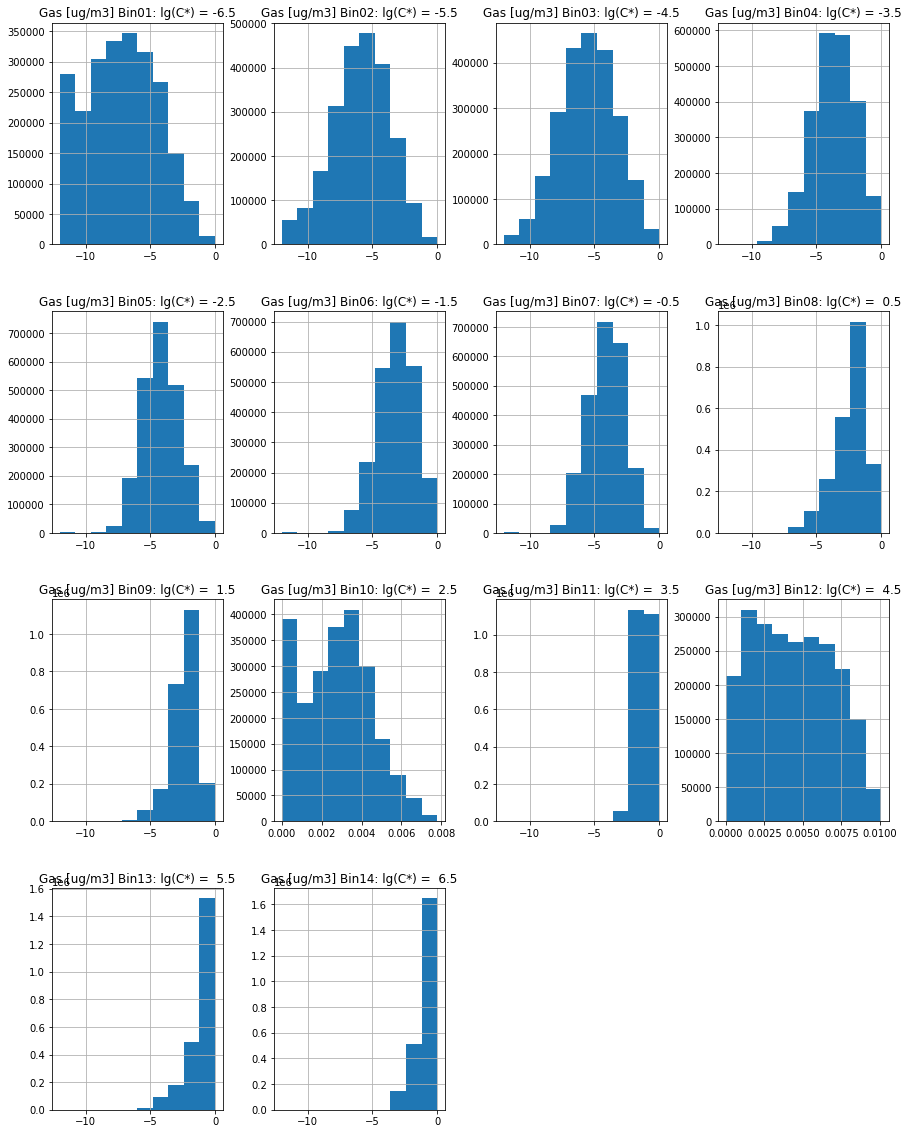

In [243]:
gas.hist(figsize=(15,20))

### Aerosol

In [231]:
aero_cols = [
    'Aerosol [ug_m3] Bin01: lg(C*) = -6.5',
    'Aerosol [ug_m3] Bin02: lg(C*) = -5.5',
    'Aerosol [ug_m3] Bin03: lg(C*) = -4.5',
    'Aerosol [ug_m3] Bin04: lg(C*) = -3.5',
    'Aerosol [ug_m3] Bin05: lg(C*) = -2.5',
    'Aerosol [ug_m3] Bin06: lg(C*) = -1.5',
    'Aerosol [ug_m3] Bin07: lg(C*) = -0.5',
    'Aerosol [ug_m3] Bin08: lg(C*) =  0.5',
    'Aerosol [ug_m3] Bin09: lg(C*) =  1.5',
    'Aerosol [ug_m3] Bin10: lg(C*) =  2.5',
    'Aerosol [ug_m3] Bin11: lg(C*) =  3.5',
    'Aerosol [ug_m3] Bin12: lg(C*) =  4.5',
    'Aerosol [ug_m3] Bin13: lg(C*) =  5.5',
    'Aerosol [ug_m3] Bin14: lg(C*) =  6.5'   
]

In [232]:
aero = in_train[aero_cols].copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b61e6786a90>,
      dtype=object)

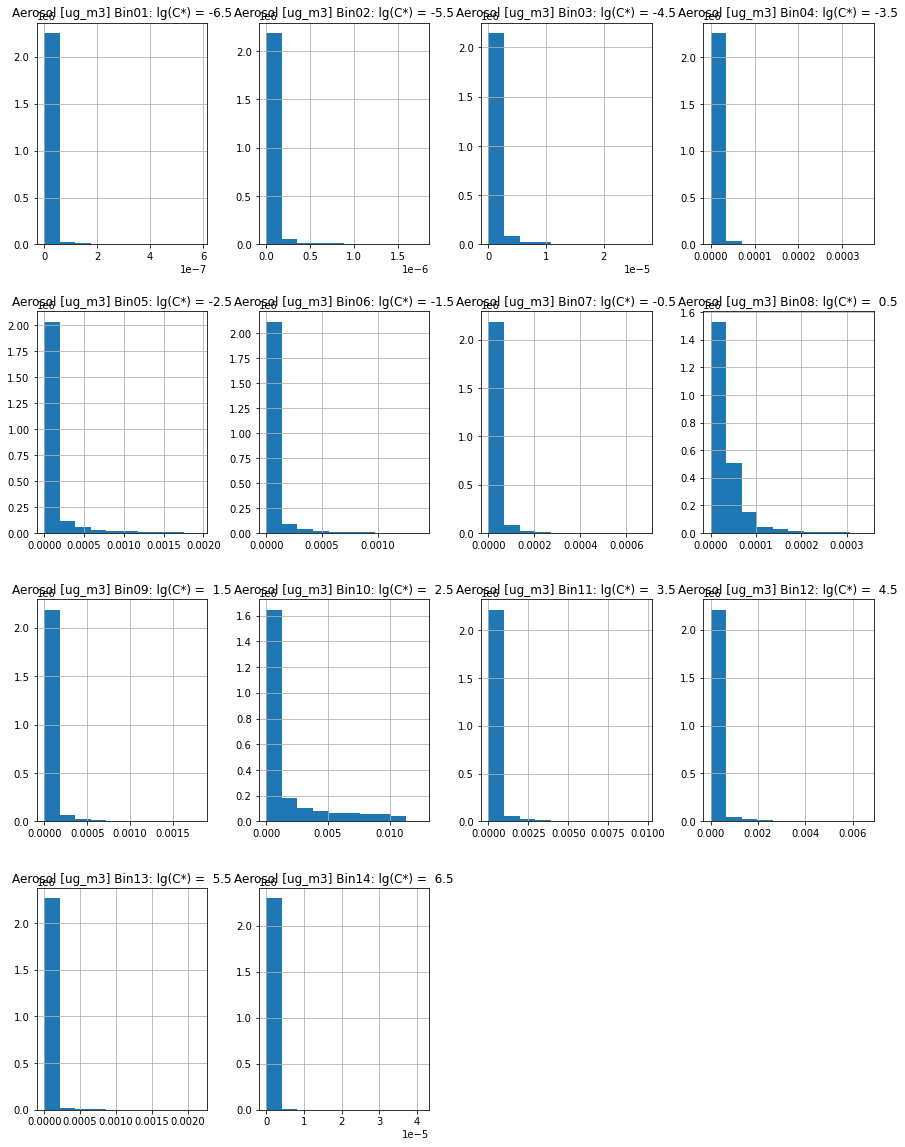

In [233]:
aero.hist(figsize=(15,20))

In [234]:
for col in aero_cols:
    scaler = MinMaxScaler((1.0e-12, 1))
    resized = np.expand_dims(aero[col].to_numpy(), 1)
    aero[col] = scaler.fit_transform(resized).squeeze(1)
    aero[col] = np.log10(aero[col])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2b61e6e6be90>,
      dtype=object)

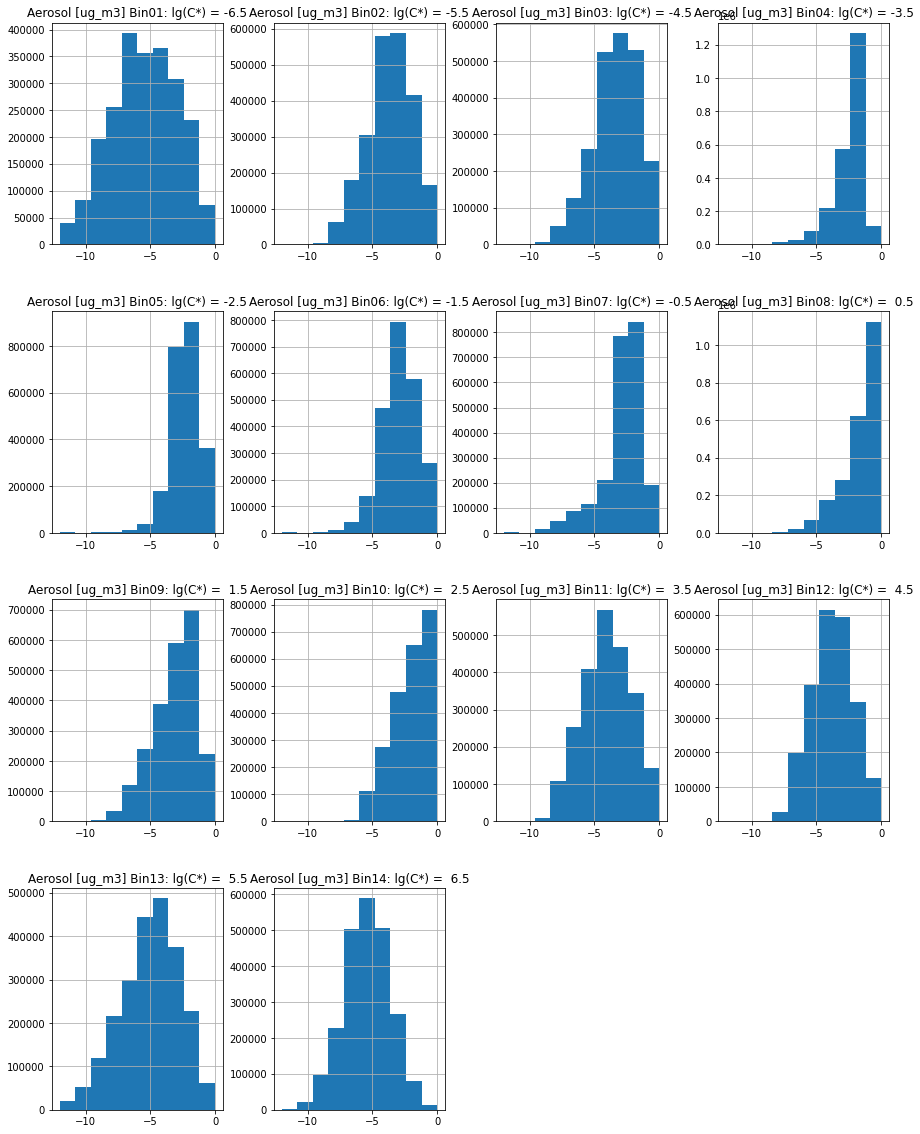

In [235]:
aero.hist(figsize=(15,20))